In [1]:
random_state = 2457

# Machine-Learning

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import shap

from sklearn.model_selection import train_test_split # Random Split
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.preprocessing import StandardScaler

from sklearn import set_config
set_config(transform_output="pandas") # Keeps feature names after pipeline

In [3]:
def calculate_score(y_true, y_pred):
    print(f"R2 Score {r2_score(y_true, y_pred)}")
    print(f"RMSE : {np.sqrt(mean_squared_error(y_true, y_pred))}")

def plot(y_true, y_pred):
    # Plotly express plot
    h = pd.DataFrame(data={'Actual y':y_true, 'Predicted y': y_pred})
    fig = px.scatter(h, x='Actual y', y='Predicted y')
    fig.show()

In [4]:
df = pd.read_csv('data/clean_listing.csv')
df.head()

,Unnamed: 0,neighbourhood_cleansed_Ang Mo Kio,neighbourhood_cleansed_Bedok,neighbourhood_cleansed_Bishan,neighbourhood_cleansed_Bukit Batok,neighbourhood_cleansed_Bukit Merah,neighbourhood_cleansed_Bukit Panjang,neighbourhood_cleansed_Bukit Timah,neighbourhood_cleansed_Central Water Catchment,neighbourhood_cleansed_Choa Chu Kang,...,Free parking on premises,Refrigerator,Microwave,Building staff,Iron,distance_from_MRT,distance_from_Bus,distance_from_Mall,distance_from_School,distance_from_Food
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,False,False,False,0.842953,0.180102,7.976199,3.515767,0.785094
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,0.880282,0.205346,7.952045,3.786036,0.502588
2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,0.549557,0.117975,4.230675,1.095807,0.169376
3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,0.609339,0.040906,3.862544,0.685090,0.208523
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,True,0.738518,0.210803,7.816646,3.809634,0.506811


In [5]:
print(f"The standard deviation of price of listing is ${df['price'].std():.2f}.")

The standard deviation of price of listing is $132.36.


In [6]:
# Split data and drop unnecessary data
Y = df['price']
X = df.drop(['price', 'Unnamed: 0', 'latitude', 'longitude'], axis=1)
X = X.astype('float64')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=random_state)

In [8]:
X.head()

,neighbourhood_cleansed_Ang Mo Kio,neighbourhood_cleansed_Bedok,neighbourhood_cleansed_Bishan,neighbourhood_cleansed_Bukit Batok,neighbourhood_cleansed_Bukit Merah,neighbourhood_cleansed_Bukit Panjang,neighbourhood_cleansed_Bukit Timah,neighbourhood_cleansed_Central Water Catchment,neighbourhood_cleansed_Choa Chu Kang,neighbourhood_cleansed_Clementi,...,Free parking on premises,Refrigerator,Microwave,Building staff,Iron,distance_from_MRT,distance_from_Bus,distance_from_Mall,distance_from_School,distance_from_Food
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.842953,0.180102,7.976199,3.515767,0.785094
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.880282,0.205346,7.952045,3.786036,0.502588
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.549557,0.117975,4.230675,1.095807,0.169376
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.609339,0.040906,3.862544,0.685090,0.208523
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.738518,0.210803,7.816646,3.809634,0.506811


# Part 1:
Finding a model that best predicts price. We will being trying :
- linear model: Linear Regression
- tree-based model: HistGradientBoostRegressor, XGBoost
- and to try something new: Neural Network.

We will be using $R^2$ score to compare the goodness of the model, and RMSE to find the accuracy of the prediction.

### Model 1: Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print(f"Train\n Score: {model.score(X_train, y_train)}")
calculate_score(y_train, y_train_pred)

print(f"Test\n Score: {model.score(X_test, y_test)}")
calculate_score(y_test, y_pred)

plot(y_test, y_pred)

Train
 Score: 0.6200800522823017
R2 Score 0.6200800522823017
RMSE : 82.06905348209689
Test
 Score: 0.5715708739889218
R2 Score 0.5715708739889218
RMSE : 84.21673673425332


In [10]:
# explainer = shap.Explainer(model.predict, X_test)
# shap_values = explainer(X)
# shap.plots.waterfall(shap_values[20], max_display=14)

In [11]:
# for i in range(X.shape[1]):
#     print(X.columns[i], "=", model.coef_[i].round(5))

### Model 2: Gradient Boost Regressor

We can use gradient boosting - a type of ensemble machine learning algorithms. Ensemble is a collection of decision trees. Every iteration, a decision tree is added to model to minimise the error. Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm, and the goal is to minimise loss gradient. We will be using HistGradientBoostingRegressor from sklearn.

In [12]:
from sklearn.ensemble import HistGradientBoostingRegressor

reg = HistGradientBoostingRegressor(random_state=random_state)

reg.fit(X_train, y_train)

y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)

print(f"Train\nScore: {reg.score(X_train, y_train)}")
calculate_score(y_train, y_train_pred)

print(f"Test\nScore: {reg.score(X_test, y_test)}")
calculate_score(y_test, y_pred)

plot(y_test, y_pred)

Train
Score: 0.9448898387887369
R2 Score 0.9448898387887369
RMSE : 31.25713849021717
Test
Score: 0.7488838246495966
R2 Score 0.7488838246495966
RMSE : 64.47572871633652


### Model 3: XGBoost Regression

We can use gradient boosting - a type of ensemble machine learning algorithms. Ensemble is a collection of decision trees. Every iteration, a decision tree is added to model to minimise the error. Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm, and the goal is to minimise loss gradient. We will use XGBoost API to do the model fitting.

Train
Score:0.9921366410732897
R2 Score 0.9921366410732897
RMSE : 11.806941898381032
Test
Score:0.7407141980087499
R2 Score 0.7407141980087499
RMSE : 65.51613714590538


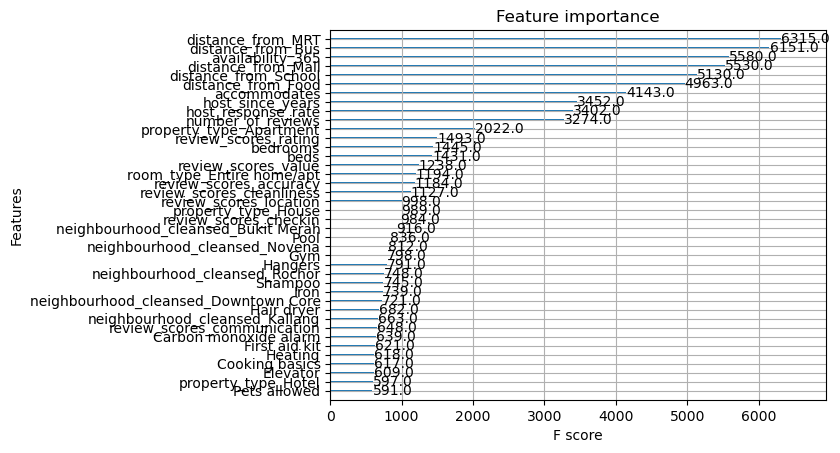

In [13]:
import xgboost as xgb

model = xgb.sklearn.XGBRegressor(tree_method='hist', objective='reg:squarederror', n_estimators = 2500,
                         learning_rate=0.01, random_state=random_state)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print(f"Train\nScore:{model.score(X_train, y_train)}")
calculate_score(y_train, y_train_pred)

print(f"Test\nScore:{model.score(X_test, y_test)}")
calculate_score(y_test, y_pred)

xgb.plot_importance(model.get_booster(), max_num_features=40)

plot(y_test, y_pred)

In [14]:
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X)
# shap.summary_plot(shap_values, X)

### Model 4: Neural Networks

In [15]:
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, Y, test_size=0.33, random_state=random_state)

s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float64))
X_val_and_test = s_scaler.transform(X_val_and_test.astype(np.float64))

X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5, random_state=random_state)

In [16]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(256, activation='linear', input_shape=(len(X_val.columns), )))
model.add(Dense(128, activation='linear'))
model.add(Dense(64, activation='linear'))
model.add(Dense(32, activation='linear'))
model.add(Dense(16, activation='linear'))
model.add(Dense(8, activation='linear'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

Input (n layers) -> Hidden Layer(s) (256, 128, ..., 8) -> Output (1 layer): Price

In [17]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
          batch_size=128,epochs=600,verbose=False)
model.summary()

2023-04-15 16:16:04.596266: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               32512     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9

<Axes: >

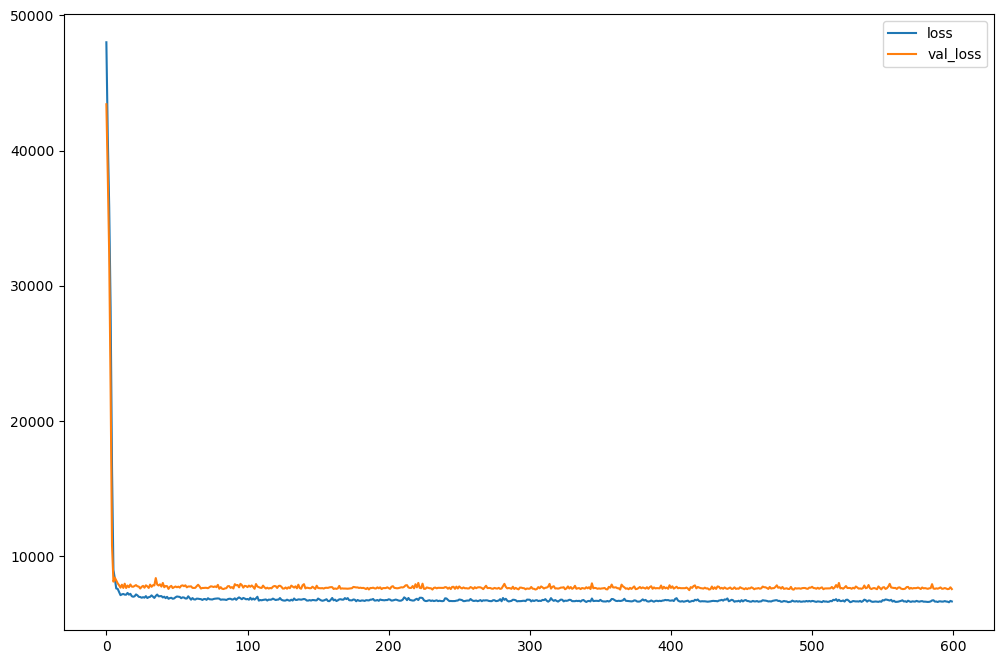

In [18]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))


In [19]:
y_pred = model.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2 Score:',explained_variance_score(y_test,y_pred))
# Visualizing Our predictions

y_pred = np.array(y_pred).flatten()
y_test = np.array(y_test)

plot(y_test, y_pred)


15/15 [==============================] - 0s 523us/step
RMSE: 87.39830850909578
R^2 Score: 0.5420254256965471


We can conclude that HistGradientBoostingRegressor and XGBoost Regressor achieve the best results, with the lowest RMSE (~60) and the higher R^2 score (~0.75). All other models achieve decent results, with RMSE around half of standard deviation, and R^2 > 0.5.

# Part 2: Optimising models

We will be using RandomizedSearchCV, GridSearchCV to find the optimal parameters.
- Benefit: Can finds optimal values between the 'grid' in a GridSearchCV, do not need prior experience & intuition.
- Downside: Takes significantly longer to find optimal values.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=random_state)

In [21]:
from scipy.stats import loguniform
# Code from scikit-learn-mooc
class loguniform_int:
    """Integer valued version of the log-uniform distribution"""
    def __init__(self, a, b):
        self._distribution = loguniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)

In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model = HistGradientBoostingRegressor(random_state=random_state)#.fit(X_train, y_train)

param_distributions = {
    'max_bins': loguniform_int(2, 255),
    'max_leaf_nodes': loguniform_int(2, 256),
    'min_samples_leaf': loguniform_int(1, 100),
    'learning_rate': loguniform(0.001, 10),
}

cv = RandomizedSearchCV(model, param_distributions=param_distributions, n_iter=350, cv=3, n_jobs=-1) 

cv.fit(X_train, y_train)
print(cv.best_params_)
est = cv.best_estimator_
y_pred = est.predict(X_test)
calculate_score(y_test, y_pred)

/opt/homebrew/Caskroom/mambaforge/base/envs/datascience/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



{'learning_rate': 0.05818511709746038, 'max_bins': 166, 'max_leaf_nodes': 189, 'min_samples_leaf': 12}
R2 Score 0.7477210612614842
RMSE : 64.62482988851468


In [23]:
v = pd.DataFrame(cv.cv_results_)
v.sort_values(by='rank_test_score', inplace=True)
v.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_bins,param_max_leaf_nodes,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,1.215724,0.069551,0.013997,0.007213,0.058185,166,189,12,"{'learning_rate': 0.05818511709746038, 'max_bi...",0.707553,0.711222,0.719196,0.712657,0.004861,1
349,0.714858,0.063971,0.007805,0.000117,0.049106,64,77,8,"{'learning_rate': 0.049105672320482, 'max_bins...",0.711231,0.698478,0.721706,0.710472,0.009498,2
169,0.284046,0.010421,0.007526,0.002686,0.161721,6,19,7,"{'learning_rate': 0.16172087781890432, 'max_bi...",0.703903,0.713591,0.713024,0.710173,0.004439,3
114,1.037351,0.007325,0.008823,0.001233,0.082084,121,76,3,"{'learning_rate': 0.08208368756756042, 'max_bi...",0.723825,0.703797,0.693873,0.707165,0.012457,4
21,0.330501,0.017328,0.007128,0.002263,0.22011,6,32,6,"{'learning_rate': 0.22011040568084472, 'max_bi...",0.695189,0.703642,0.722006,0.706946,0.011194,5
347,0.710071,0.025141,0.008948,0.000867,0.077416,64,109,25,"{'learning_rate': 0.0774158116324961, 'max_bin...",0.695732,0.701396,0.720234,0.705787,0.010474,6
248,0.372029,0.015290,0.007210,0.001997,0.169132,3,33,2,"{'learning_rate': 0.16913159664373933, 'max_bi...",0.697509,0.708481,0.703654,0.703214,0.004490,7
214,0.408716,0.016182,0.007260,0.002307,0.112936,5,45,3,"{'learning_rate': 0.11293603972021438, 'max_bi...",0.704836,0.704376,0.700411,0.703208,0.001986,8
314,0.388424,0.016633,0.006831,0.001632,0.042092,15,28,5,"{'learning_rate': 0.04209207567737261, 'max_bi...",0.702071,0.703060,0.704155,0.703095,0.000851,9
78,0.390836,0.007399,0.004671,0.000590,0.124497,141,21,7,"{'learning_rate': 0.12449656169738635, 'max_bi...",0.700913,0.697668,0.710014,0.702865,0.005226,10


In [24]:
print(f"Best parameters: {v.iloc[0]['params']}")

Best parameters: {'learning_rate': 0.05818511709746038, 'max_bins': 166, 'max_leaf_nodes': 189, 'min_samples_leaf': 12}


We can see that parameters with rank 1 has higher R^2 score. 

Note that due to cross-validation, R^2 score in GridSearchCV is lower than the above example, however it still shows the better parameters.

In [25]:
model = HistGradientBoostingRegressor(**cv.best_params_, random_state=random_state).fit(X_train, y_train)
y_pred = model.predict(X_test)
calculate_score(y_test, y_pred)

R2 Score 0.7477210612614842
RMSE : 64.62482988851468


In [26]:
plot(y_test, y_pred)

### Tuning XGBoost Regressor

Parameters to tune:
- n estimators & learning_rate: Takes longer to achieve same error reduction, however smaller steps taken means we can find the optimal minimum
- max_leaves (default 0): By restricting max leaves, we can reduce overfitting.
- colsample_bytree (default 1): Fraction of columns to be randomly sampled, might reduce overfitting.
- subsample (default 1): Fraction of observations to sample for each tree, lower values reduce overfitting.

In [27]:
model = xgb.XGBRegressor(tree_method='hist', objective='reg:squarederror', seed=random_state)

params_grid = {
    'n_estimators': [1000, 1500],
    'learning_rate': [0.03, 0.05],
    'max_leaves': [0, 20, 40, 60, 80],
    'colsample_bytree': [0.4, 0.6, 0.8],
    'subsample': [0.6, 0.8, 1],
    # 'alpha': [0, 1],
    # 'lambda': [1, 2],
    # 'gamma': [0, 1],

}

cv = GridSearchCV(estimator=model, param_grid=params_grid, cv=3, n_jobs=-1) #cv=3 to reduce waiting time

cv.fit(X_train, y_train)
print(cv.best_params_)
est = cv.best_estimator_
y_pred = est.predict(X_test)
calculate_score(y_test, y_pred)

/opt/homebrew/Caskroom/mambaforge/base/envs/datascience/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



{'colsample_bytree': 0.4, 'learning_rate': 0.03, 'max_leaves': 0, 'n_estimators': 1500, 'subsample': 0.6}
R2 Score 0.7515609992310798
RMSE : 64.13111668336165


In [28]:
v = pd.DataFrame(cv.cv_results_)
v.sort_values(by='rank_test_score', inplace=True)
v.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_leaves,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,2.733026,0.052307,0.031163,0.002705,0.4,0.03,0,1500,0.6,"{'colsample_bytree': 0.4, 'learning_rate': 0.0...",0.720836,0.732092,0.742668,0.731865,0.008914,1
27,3.022928,0.046704,0.043395,0.011315,0.4,0.03,80,1500,0.6,"{'colsample_bytree': 0.4, 'learning_rate': 0.0...",0.720836,0.732092,0.742668,0.731865,0.008914,1
21,2.676250,0.097209,0.036094,0.007443,0.4,0.03,60,1500,0.6,"{'colsample_bytree': 0.4, 'learning_rate': 0.0...",0.720762,0.731685,0.742797,0.731748,0.008996,3
59,3.685268,0.131350,0.048539,0.008409,0.4,0.05,80,1500,1,"{'colsample_bytree': 0.4, 'learning_rate': 0.0...",0.729686,0.729632,0.735826,0.731715,0.002907,4
35,2.821607,0.083813,0.041890,0.006666,0.4,0.05,0,1500,1,"{'colsample_bytree': 0.4, 'learning_rate': 0.0...",0.729686,0.729632,0.735826,0.731715,0.002907,4
56,2.241684,0.023851,0.033629,0.001484,0.4,0.05,80,1000,1,"{'colsample_bytree': 0.4, 'learning_rate': 0.0...",0.729606,0.729502,0.735809,0.731639,0.002949,6
32,1.998235,0.078758,0.027301,0.004303,0.4,0.05,0,1000,1,"{'colsample_bytree': 0.4, 'learning_rate': 0.0...",0.729606,0.729502,0.735809,0.731639,0.002949,6
53,3.457081,0.071336,0.041532,0.003777,0.4,0.05,60,1500,1,"{'colsample_bytree': 0.4, 'learning_rate': 0.0...",0.728463,0.730335,0.735811,0.731537,0.003118,8
50,2.226660,0.152337,0.028288,0.000394,0.4,0.05,60,1000,1,"{'colsample_bytree': 0.4, 'learning_rate': 0.0...",0.728031,0.730342,0.735809,0.731394,0.003261,9
24,1.948669,0.137765,0.029391,0.005960,0.4,0.03,80,1000,0.6,"{'colsample_bytree': 0.4, 'learning_rate': 0.0...",0.720389,0.731913,0.741789,0.731364,0.008745,10


In [29]:
print(f"Best parameters: {v.iloc[0]['params']}")

Best parameters: {'colsample_bytree': 0.4, 'learning_rate': 0.03, 'max_leaves': 0, 'n_estimators': 1500, 'subsample': 0.6}


In [30]:
model = xgb.XGBRegressor(**cv.best_params_,).fit(X_train, y_train)
y_pred = model.predict(X_test)
calculate_score(y_test, y_pred)

R2 Score 0.7518946043669279
RMSE : 64.08804442658327


For XGBoost Regression, with parameters tuned, it is the best model, with R^2 score of 0.8 and RMSE score of 56.

In [31]:
plot(y_test, y_pred)

## Part 3: Evaluation
